In [1]:
import scipy.io as sio
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline  

In [2]:
def Rosenbrock(xx1, xx2):
    ret = np.square(1-xx1) + 100 * np.square((xx2 - np.square(xx1)))
    return ret

In [3]:
def RosenbrockDeriv(x1, x2):
    derivX1 = 400 * x1 * (np.dot(x1,x1) - x2) + 2 * (x1 - 1);
    derivX2 = -200 * (np.dot(x1,x1) - x2)
    return np.array([derivX1, derivX2])

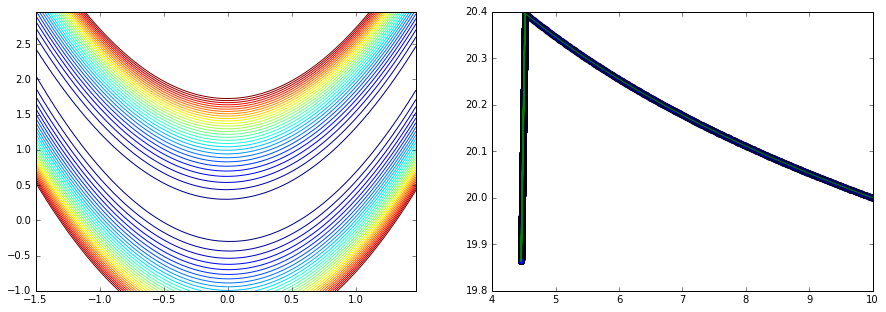

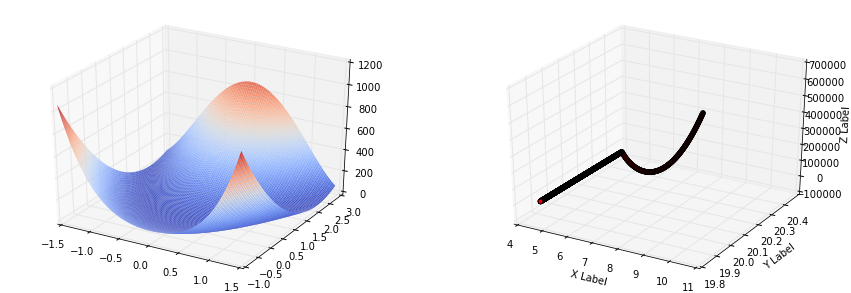

In [9]:
x1 = np.arange(-1.5,1.5, 0.03)
x2 = np.arange(-1,3,0.04)

[X1, X2] = np.meshgrid(x1,x2);
f = Rosenbrock(X1, X2)
levels = np.arange(10,310,10)
LW = 'linewidth'
FS = 'fontsize'
MS = 'markersize'
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.contour(X1, X2, f, levels, linewidth=1.2)

itr = 5000

theta = np.zeros((itr,2))
theta[0][:] = np.array([10,20])
h = 0.01

for i in range(1,itr):
    derivX = RosenbrockDeriv(theta[i-1,0], theta[i-1,1])
    derivX1 = derivX[0]
    derivX2 = derivX[1]
    scale = np.sqrt(np.dot(derivX1,derivX1)+np.dot(derivX2, derivX2))
    derivX1 = derivX1/scale
    derivX2 = derivX2/scale
    theta[i,0] = theta[i-1,0] - h*derivX1
    theta[i,1] = theta[i-1,1] - h*derivX2
    
plt.subplot(1,2,2)
plt.plot(theta[:,0], theta[:,1], "o")
plt.plot(theta[:,0], theta[:,1])
plt.show()

fig = plt.figure(1, figsize = (15,5));
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X1, X2, f, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=True)
#plt.show()

value = np.zeros((itr,1))
for i in range(itr):
    value[i] = Rosenbrock(theta[i,0], theta[i,1])
    
fig = plt.figure(1, figsize = (7,5));
ax = fig.add_subplot(122, projection='3d')
n = 100
xs = theta[:,0]
ys = theta[:,1]
zs = np.transpose(value)[0]
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()